In [38]:
%pip install -upgrade pip


Usage:   
  /home/imam/.rye/py/cpython@3.12.7/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/imam/.rye/py/cpython@3.12.7/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/imam/.rye/py/cpython@3.12.7/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/imam/.rye/py/cpython@3.12.7/bin/python -m pip install [options] [-e] <local project path> ...
  /home/imam/.rye/py/cpython@3.12.7/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install pandas


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

df = pd.read_csv("data.csv")
df

,weight_monotonicity,weight_smoothness,weight_empty,weight_max_corner,weight_max_tile,weight_node_average,weight_node_access,score,max_tile
0,2.41,2.36,1.05,0.25,1.13,0.43,0.22,2664,256
1,2.41,2.36,1.05,0.25,1.13,0.43,0.22,3112,256
2,2.41,2.36,1.05,0.25,1.13,0.43,0.22,3072,256
3,2.41,2.36,1.05,0.25,1.13,0.43,0.22,5400,512
4,2.41,2.36,1.05,0.25,1.13,0.43,0.22,7316,512
...,...,...,...,...,...,...,...,...,...
495,1.21,0.65,1.22,1.23,1.35,1.09,0.27,5156,512
496,1.21,0.65,1.22,1.23,1.35,1.09,0.27,5420,512
497,1.21,0.65,1.22,1.23,1.35,1.09,0.27,5608,512
498,1.21,0.65,1.22,1.23,1.35,1.09,0.27,10424,1024


In [17]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Verify columns are fixed
print(df.columns)

weight_list = list(df)[:-2]
grouped = df.groupby(weight_list).agg(
    score_mean=('score', 'mean'),
    score_variance=('score', 'var'),
    max_tile_mean=('max_tile', 'mean'),
    max_tile_variance=('max_tile', 'var')
).reset_index()

Index(['weight_monotonicity', 'weight_smoothness', 'weight_empty',
       'weight_max_corner', 'weight_max_tile', 'weight_node_average',
       'weight_node_access', 'score', 'max_tile'],
      dtype='object')


In [25]:
grouped

,weight_monotonicity,weight_smoothness,weight_empty,weight_max_corner,weight_max_tile,weight_node_average,weight_node_access,score_mean,score_variance,max_tile_mean,max_tile_variance
0,1.00,1.35,1.52,0.62,1.10,0.75,0.07,6829.6,3092772.8,614.4,52428.8
1,1.00,1.39,0.99,0.82,0.42,1.84,0.28,8131.2,20300139.2,742.4,167116.8
2,1.06,1.45,1.64,1.19,1.32,0.54,0.28,4791.2,3127579.2,358.4,19660.8
3,1.09,1.20,1.12,1.47,0.18,1.73,0.28,9704.8,7656091.2,819.2,78643.2
4,1.11,2.78,0.51,0.98,1.23,0.50,0.12,3620.8,611747.2,307.2,13107.2
...,...,...,...,...,...,...,...,...,...,...,...
95,2.91,2.72,1.66,0.18,0.69,1.04,0.16,5636.8,470843.2,512.0,0.0
96,2.93,0.74,1.57,1.48,0.67,0.19,0.14,7480.8,10619691.2,665.6,117964.8
97,2.94,1.84,1.84,1.24,1.37,0.76,0.14,4228.8,2813051.2,332.8,29491.2
98,2.95,2.65,1.87,0.88,1.41,1.48,0.37,8891.2,11246235.2,768.0,131072.0


In [27]:
sorted_df = grouped.sort_values(by=['score_mean', 'score_variance'], ascending=[False, True])

In [32]:
# print(sorted_df.to_string())
sorted_df

,weight_monotonicity,weight_smoothness,weight_empty,weight_max_corner,weight_max_tile,weight_node_average,weight_node_access,score_mean,score_variance,max_tile_mean,max_tile_variance
90,2.77,1.35,0.54,1.04,0.35,0.81,0.13,10858.4,16716164.8,870.4,117964.8
33,1.58,1.09,1.44,1.45,0.28,1.99,0.18,10766.4,6563356.8,921.6,52428.8
19,1.33,1.80,1.88,0.61,1.00,1.94,0.13,10715.2,15654395.2,921.6,52428.8
42,1.82,2.31,0.51,1.04,0.25,0.95,0.18,10364.0,10487624.0,819.2,78643.2
18,1.30,0.70,0.59,0.64,1.02,0.99,0.27,10049.6,21423420.8,716.8,78643.2
...,...,...,...,...,...,...,...,...,...,...,...
25,1.48,2.27,1.28,1.06,1.29,0.14,0.25,4256.0,908224.0,358.4,19660.8
97,2.94,1.84,1.84,1.24,1.37,0.76,0.14,4228.8,2813051.2,332.8,29491.2
5,1.13,2.66,0.86,1.07,0.83,0.12,0.25,4198.4,3694060.8,332.8,29491.2
74,2.44,2.18,1.18,0.21,1.46,0.19,0.06,4001.6,3530436.8,281.6,19660.8


In [35]:
%pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


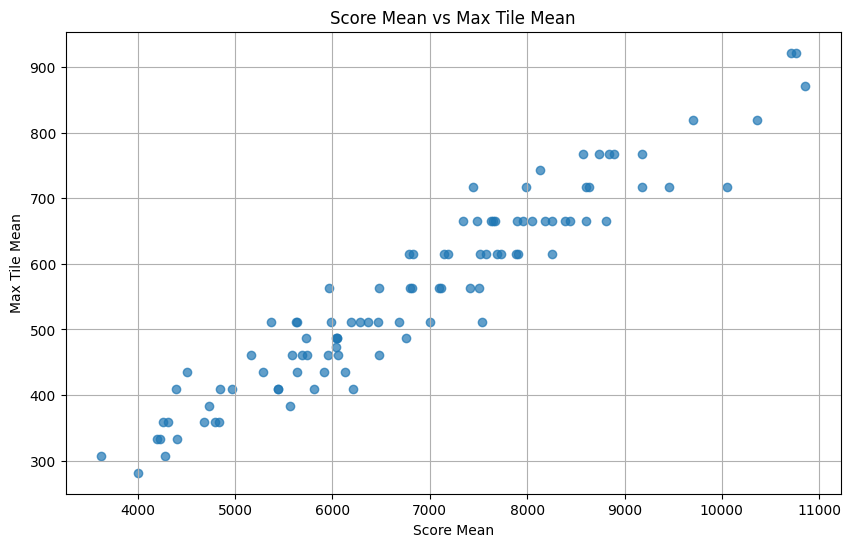

In [37]:
# Sort the DataFrame
plot_df = sorted_df.sort_values(by=['score_mean', 'score_variance'], ascending=[False, True])

# Plot
import matplotlib.pyplot as plt

x = plot_df['score_mean']
y = plot_df['max_tile_mean']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Score Mean vs Max Tile Mean')
plt.xlabel('Score Mean')
plt.ylabel('Max Tile Mean')
plt.grid(True)
plt.show()
